In [28]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


In [2]:
# Read the data

sales = pd.read_csv("advertising.csv", index_col=0)

In [3]:
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
#Check for Null Values

sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No Null Values are Present

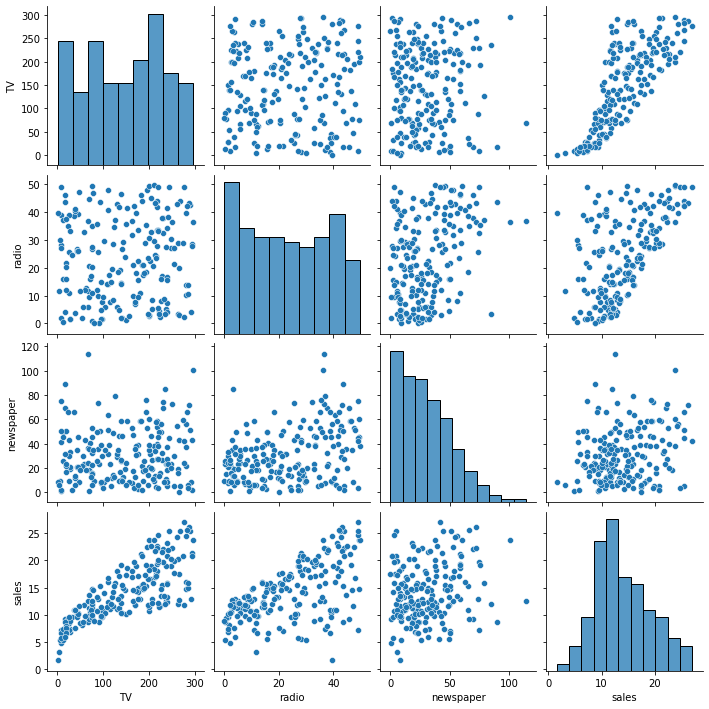

In [7]:
sns.pairplot(sales)

# Outlier Analysis

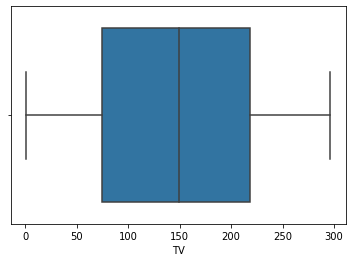

In [8]:
sns.boxplot(x=sales['TV'])

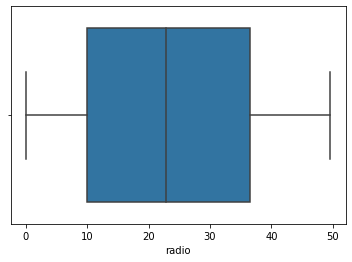

In [9]:
sns.boxplot(x=sales['radio'])

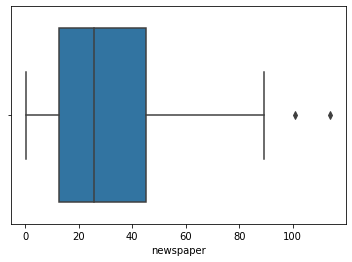

In [10]:
sns.boxplot(x=sales['newspaper'])

In [11]:
from scipy import stats
z = np.abs(stats.zscore(sales))
print(z)


[[9.69852266e-01 9.81522472e-01 1.77894547e+00 1.55205313e+00]
 [1.19737623e+00 1.08280781e+00 6.69578760e-01 6.96046111e-01]
 [1.51615499e+00 1.52846331e+00 1.78354865e+00 9.07405869e-01]
 [5.20496822e-02 1.21785493e+00 1.28640506e+00 8.60330287e-01]
 [3.94182198e-01 8.41613655e-01 1.28180188e+00 2.15683025e-01]
 [1.61540845e+00 1.73103399e+00 2.04592999e+00 1.31091086e+00]
 [1.04557682e+00 6.43904671e-01 3.24708413e-01 4.27042783e-01]
 [3.13436589e-01 2.47406325e-01 8.72486994e-01 1.58039455e-01]
 [1.61657614e+00 1.42906863e+00 1.36042422e+00 1.77205942e+00]
 [6.16042873e-01 1.39530685e+00 4.30581584e-01 6.57617064e-01]
 [9.45155670e-01 1.17923146e+00 2.92486143e-01 1.04190753e+00]
 [7.90028350e-01 4.96973404e-02 1.22232878e+00 6.48970529e-01]
 [1.43908760e+00 7.99208859e-01 1.62704048e+00 9.26620392e-01]
 [5.78501712e-01 1.05768905e+00 1.07502697e+00 8.30547775e-01]
 [6.66253447e-01 6.50657027e-01 7.11007392e-01 9.56402904e-01]
 [5.64664612e-01 1.65000572e+00 1.02862691e+00 1.609696

In [12]:
threshold = 3
print(np.where(z > 3))

(array([ 16, 101], dtype=int32), array([2, 2], dtype=int32))


In [13]:
sales = sales[(z < 3).all(axis=1)]

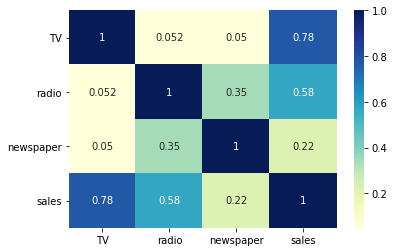

In [14]:
#correlation using heatmap

sns.heatmap(sales.corr(), cmap='YlGnBu', annot=True)

We can observe high correlation between the target variable sales and One of the feature TV.  

In [15]:
#Seperate  the dataset as target variable and feature variable
x= sales.drop("sales",axis=1)
y= sales["sales"]

In [16]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 25)

In [17]:
import statsmodels.api as sm

In [18]:
results = sm.OLS(y_train, x_train).fit()

In [19]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2577.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                   5.41e-132
Time:                        17:43:43   Log-Likelihood:                         -340.23
No. Observations:                 158   AIC:                                      686.5
Df Residuals:                     155   BIC:                                      695.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
y_pred = results.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

np.sqrt(mean_squared_error(y_test, y_pred))

r_square = r2_score(y_test, y_pred)
print(r_square)

0.9022729829786141


In [24]:
dtr = DecisionTreeRegressor(max_depth = 2)

In [25]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [26]:
pred_dtr = dtr.predict(x_test)

In [27]:
np.sqrt(mean_squared_error(y_test, pred_dtr))

r_square = r2_score(y_test, pred_dtr)
print(r_square)

0.8113569457110876


In [30]:
lr = LinearRegression()

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
pred_lr = lr.predict(x_test)

In [33]:
np.sqrt(mean_squared_error(y_test, pred_lr))

r_square = r2_score(y_test, pred_lr)
print(r_square)

0.9371746629622535


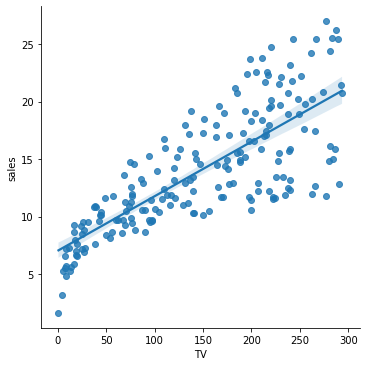

In [37]:
sns.lmplot(x="TV", y="sales", data=sales)

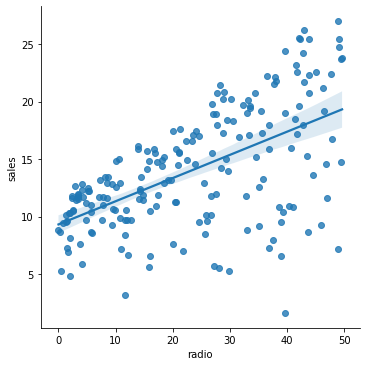

In [47]:
sns.lmplot(x="radio", y="sales", data=sales)

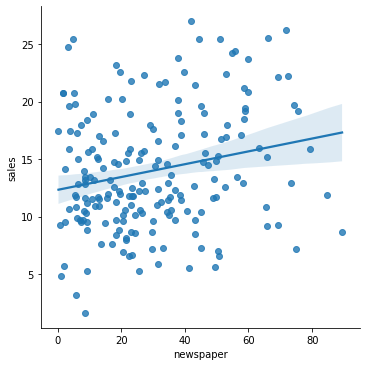

In [46]:
sns.lmplot(x="newspaper", y="sales", data=sales)

R Square Results

1. OLS - 90.22%
2. DT Regressor - 81.13%
3. Linear Regression - 93.71%

As we can see from the r square results above the linear regression model is the best fit.